# 1 <b>Facies classification-SEG Dataset</b>
---

<b><h2>Business Objective:</h2></b> Interpret reservoir characteristics and properties, to achieve better understanding of rocks for hydrocarbons reserves's estimation.

<b><h4>Project Objective:</h4></b> Predict target facies using different classifiers algorithms
to estimate new Oil & Gas wells to be drilled in undeveloped areas of the field.

The first part of this project uses a SEG (Society of Exploration Geophysicist) dataset and workflow based in the tutorial-paper: "Facies classification using machine learning" found in http://github.com/seg. This notebook follows similar steps to reproduce facies classification tasks by relying on sklearn algorithms and metrics.

For Unit 1. of UNAL MLDS course, data gathering, edition, and visualization techniques will be used. The second part of the Notebook uses Machine learning classification algorithms which briefly touch on contents to be lectured and learned in Unit 2. of UNAL MLDS course.

### <b>Glosary</b>

**Well or Wellbore:** In drilling, the drilled hole.

**Reservoir:** An independent hydrocarbon holding rock.

**GR (Gamma Ray log):**:Uses a scintillation crystal and a photomultiplier tube to measure naturally occurring and artificially induced gamma-ray radiation. The gamma-ray radiation is a signature of the formations in a well – very useful in depth control. Used in open hole or pipe and also used to spot changes in radiation (NORM scale) and radioactive tracers. Abbreviated GR. 

**Resistivity (ILD-Log10):** Measurement of a substance (or rock) to resist the flow of electric charge. Opposite of Conductance. Example: *A rock with high resistivity might contain hydrocarbons (oil or gas). Conversely a rock with low resistivity might contain salty water in it's pores.*

**Porosity (DeltaPHI):** The percentage of the rock volume that is not rock grains and could be occupied by fluids. Pores may or may not be connected.
The volume percentage of the total bulk not occupied by solid particles.

**Neutron Log(NPHI):** A log whose source emits neutrons into the formation. Neutrons interact with hydrogen nuclei resulting in an energy loss that is converted to neutron porosity. All hydrocarbons and water contain hydrogen, but the formation usually does not. The amount of hydrogen in the gas affects the reading, so gas filled porosity shows a lower log porosity than oil or water filled porosity.

**Density Log (RHOB):**One of a number of logging techniques that estimate the density of the formation.

**Neutron-Porosity (PhiND):** A computation of porosity, from a combination of neutron and porosity logs readings.

**PE (PhotoElectric Factor):** A log of photoelectric absorption properties. The log measures the photoelectric absorption factor, Pe, which is defined as (Z/10)^3.6 where Z is the average atomic number of the formation. Pe is unitless, but since it is proportional to the photoelectric cross section per electron, it is sometimes quoted in barns/electron.

**NM_M:** Non Marine to Marine environment. Fraction of a portion of rock deposited in non marine environment with respect to a portion deposited in marine environment.

**RELPOS:** Relative position.

**Facies:** A different part of the rock strata indicating a change in mineral content or deposition mechanics.


In [24]:
# Importing the required default packages
import numpy as np
import pandas as pd

# Visualization
from IPython.display import display
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler 

#Statistics
from scipy import stats
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC

# Metrics 
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [25]:
# Ignoring the warnings
import warnings
warnings.filterwarnings("ignore")

*A set of images are given below with the types of rocks (facies) intended to be predicted*

Facies Definition:

*   1=sandstone
*   2=coarse_siltstone
*   3=fine_siltstone
*   4=marine_silt_shale 
*   5=mudstone
*   6=wackestone
*   7=dolomite 
*   8=packstone 
*   9=bafflestone

A sandstone (facies 1-3):

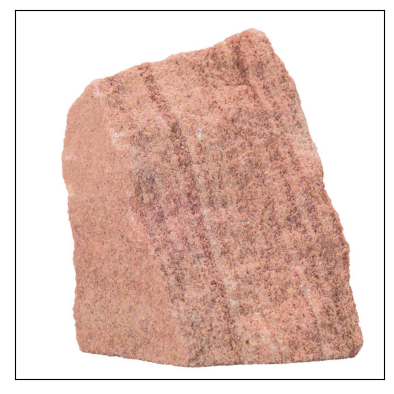

In [26]:
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('sandstone.jpg'))
plt.xticks([])
plt.yticks([])
plt.show()

A carbonate (facies 6-8):

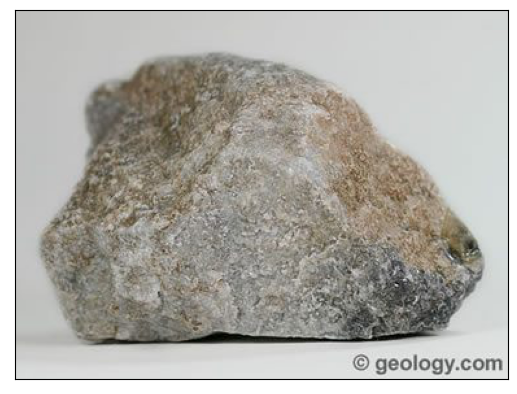

In [27]:
plt.imshow(mpimg.imread('carbonate.jpg'))
plt.xticks([])
plt.yticks([])
plt.show()

A shale (facies 5-6):

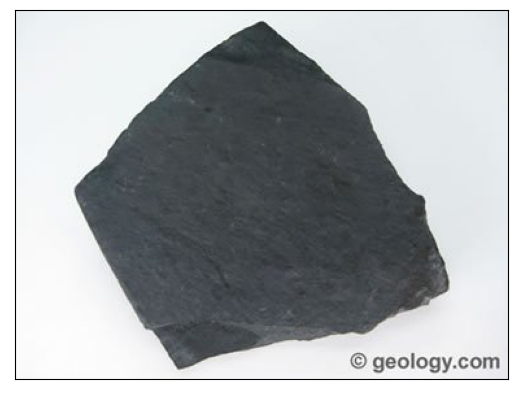

In [28]:
plt.imshow(mpimg.imread('shale.jpg'))
plt.xticks([])
plt.yticks([])
plt.show()

A logging tool run in oil&Gas wells is as depicted below, these tools are capable to obtain all the required information that we work with here as columns (features) in our datasets:

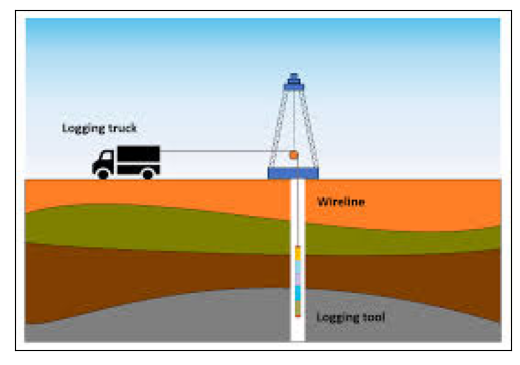

In [29]:
plt.imshow(mpimg.imread('wireline tool.jpg'))
plt.xticks([])
plt.yticks([])
plt.show()

## 1.1 Exploring the dataset
First, we examine the dataset available to train the classifier which will have the following variables

| Variable | Definition	| Values | 
| --- | --- | --- |
| Formation   | Name of rock strata               | Categorical 	|
| Well Name   | Name of Well                      | Categorical 	|
| Depth 	    | Depth of specific data (ft). 	    | Cuantitative  |
| GR          |	Gamma ray log (API) 	            | Cuantitative  |
| ILD_Log10   | Resistivity values (Ohm-m)        | Cuantitative  |
| DeltaPHI    |	Porosity difference (%).	        | Cuantitative  |
| PHIND       |	Porosity from Neutron Density (%) | Cuantitative  |
| PE          |	Photoelectric factor              | Cuantitative  |
| NM_M        |	Non Marine to marine ratio        | Cuantitative  |
| RELPOS      |	Relative Position                 | Cuantitative  |
| Facies      |	Rock type classification          | Categorical   |				

In [30]:
# Importing SEG Dataset
fdata=pd.read_csv('SEGData_Project.csv',index_col=0)
testingWell=pd.read_csv('training_data.csv')

In [31]:
# Showing SEG Dataset
fdata.head()

,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Facies
0,A1 SH,STUART,2808.0,66.276,0.630,3.3,10.65,3.591,1,1.000,3
1,A1 SH,STUART,2808.5,77.252,0.585,6.5,11.95,3.341,1,0.978,3
2,A1 SH,STUART,2809.0,82.899,0.566,9.4,13.60,3.064,1,0.956,3
3,A1 SH,STUART,2809.5,80.671,0.593,9.5,13.25,2.977,1,0.933,3
4,A1 SH,STUART,2810.0,75.971,0.638,8.7,12.35,3.020,1,0.911,3


In [32]:
# Showing the descriptive statistics for SEG dataset
fdata.describe()

,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Facies
count,830.000000,830.00000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,2987.070482,57.61173,0.666312,2.851964,11.655277,3.654178,1.678313,0.535807,4.948193
std,94.391925,27.52774,0.288367,3.442074,5.190236,0.649793,0.467405,0.283062,2.420453
min,2808.000000,12.03600,-0.468000,-8.900000,1.855000,2.113000,1.000000,0.013000,1.000000
25%,2911.625000,36.77325,0.541000,0.411250,7.700000,3.171500,1.000000,0.300000,3.000000
50%,2993.750000,58.34450,0.675000,2.397500,10.950000,3.515500,2.000000,0.547500,5.000000
75%,3055.375000,73.05150,0.850750,4.600000,14.793750,4.191500,2.000000,0.778000,8.000000
max,3160.500000,220.41300,1.507000,16.500000,31.335000,6.321000,2.000000,1.000000,9.000000


In [33]:
fdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 830 entries, 0 to 829
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Formation  830 non-null    object 
 1   Well Name  830 non-null    object 
 2   Depth      830 non-null    float64
 3   GR         830 non-null    float64
 4   ILD_log10  830 non-null    float64
 5   DeltaPHI   830 non-null    float64
 6   PHIND      830 non-null    float64
 7   PE         830 non-null    float64
 8   NM_M       830 non-null    int64  
 9   RELPOS     830 non-null    float64
 10  Facies     830 non-null    int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 77.8+ KB


As observed from the description above, the dataset has no Nan values, it has 830 observations and 11 features (Numeric and categorical). Let's set the object types as categorical. 

In [34]:
# Converting well names and formations into 'category' data type
fdata['Well Name'] = fdata['Well Name'].astype('category')
fdata['Formation'] = fdata['Formation'].astype('category')
fdata['Well Name'].unique()

['STUART', 'CRAWFORD']
Categories (2, object): ['CRAWFORD', 'STUART']

We observe 2 wells in our dataset. As we have few wells, and scarce data, differently from the official tutorial, we won't leave any of the two wells as blind data, nor use cross-validation splitting to train our models later. We will simply use, a regular training/testing dataset splitting. 

In [35]:
# Showing the wells and their numbers
fdata["Well Name"].value_counts()

STUART      474
CRAWFORD    356
Name: Well Name, dtype: int64

Let's see how many facies we need to work with.

In [36]:
fdata['Facies'].sort_values().unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In Detail, we have for the whole data set, the following distribution by facies:

In [37]:
fdata.groupby('Facies').count()

,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
Facies,,,,,,,,,,
1,20,20,20,20,20,20,20,20,20,20
2,159,159,159,159,159,159,159,159,159,159
3,154,154,154,154,154,154,154,154,154,154
4,65,65,65,65,65,65,65,65,65,65
5,49,49,49,49,49,49,49,49,49,49
6,127,127,127,127,127,127,127,127,127,127
7,26,26,26,26,26,26,26,26,26,26
8,212,212,212,212,212,212,212,212,212,212
9,18,18,18,18,18,18,18,18,18,18


We add a testing well (obtained from the original Github repo) for deployment purposes.

In [38]:
test_well = testingWell.loc[testingWell['Well Name']=='SHANKLE']
test_well.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449 entries, 471 to 919
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Facies     449 non-null    int64  
 1   Formation  449 non-null    object 
 2   Well Name  449 non-null    object 
 3   Depth      449 non-null    float64
 4   GR         449 non-null    float64
 5   ILD_log10  449 non-null    float64
 6   DeltaPHI   449 non-null    float64
 7   PHIND      449 non-null    float64
 8   PE         449 non-null    float64
 9   NM_M       449 non-null    int64  
 10  RELPOS     449 non-null    float64
dtypes: float64(7), int64(2), object(2)
memory usage: 42.1+ KB


In [39]:
test_well['Facies'].sort_values().unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

## 1.2 Data Visualization

We can observe each of the kde distributions for the logs, using a violin plot: there are possible outliers for both GR and ILD_log10 logs. The features are scaled, so they can be compared in a violinplot

Text(0.5, 1.0, 'Well Logs distribution')

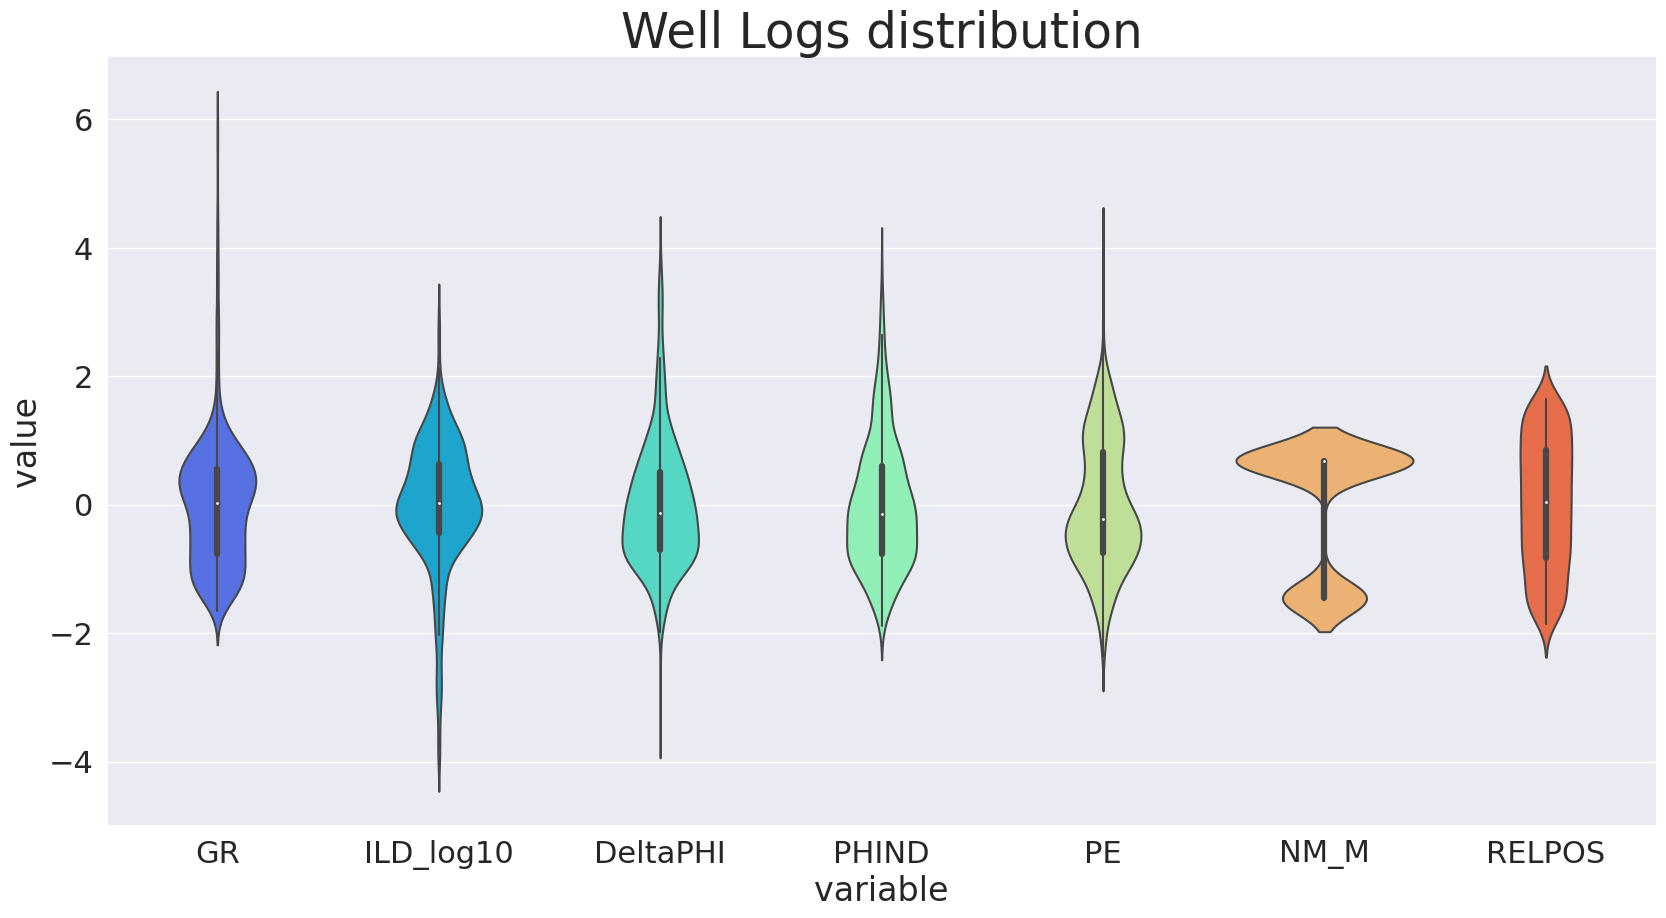

In [40]:
plt.figure(figsize = (20,10))

sns.set(font_scale = 2)
fdata1 = fdata.drop(['Formation','Well Name',"Depth", 'Facies'], axis=1)

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler().fit(fdata1) 
scaled_features = scaler.transform(fdata1)

# Creating dataframe for the scaled features
df_s = pd.DataFrame(scaled_features,columns=['GR','ILD_log10','DeltaPHI','PHIND','PE','NM_M','RELPOS'])

sns.violinplot(x="variable", y="value",data=pd.melt(df_s),palette='rainbow')
plt.title("Well Logs distribution", fontsize = 35)

In [41]:
# Facies Definition:
# 1=sandstone 2=coarse_siltstone 3=fine_siltstone 4=marine_silt_shale 5=mudstone
# 6=wackestone 7=dolomite 8=packstone 9=bafflestone
mpl.rcParams.update(mpl.rcParamsDefault)
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00','#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']
facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS','WS', 'D','PS', 'BS']

#facies_color_map is a dictionary that maps facies labels to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

def label_facies(row, labels):
    return labels[ row['Facies'] -1]
    
fdata.loc[:,'FaciesLabels'] = fdata.apply(lambda row: label_facies(row, facies_labels), axis=1)
fdata.describe()

,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Facies
count,830.000000,830.00000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,2987.070482,57.61173,0.666312,2.851964,11.655277,3.654178,1.678313,0.535807,4.948193
std,94.391925,27.52774,0.288367,3.442074,5.190236,0.649793,0.467405,0.283062,2.420453
min,2808.000000,12.03600,-0.468000,-8.900000,1.855000,2.113000,1.000000,0.013000,1.000000
25%,2911.625000,36.77325,0.541000,0.411250,7.700000,3.171500,1.000000,0.300000,3.000000
50%,2993.750000,58.34450,0.675000,2.397500,10.950000,3.515500,2.000000,0.547500,5.000000
75%,3055.375000,73.05150,0.850750,4.600000,14.793750,4.191500,2.000000,0.778000,8.000000
max,3160.500000,220.41300,1.507000,16.500000,31.335000,6.321000,2.000000,1.000000,9.000000


We observe negative values for Log-resistivity data, which seems ok if rawdata resistivity is between 0-1. As for DeltaPHI, we hypotesize negative values are due to possible gas Zones (cross-over), where the difference between Density porosity and neutron porosity might be negative.

In [42]:
%matplotlib inline
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

from pandas import set_option
set_option("display.max_rows", 10)
pd.options.mode.chained_assignment = None

def make_facies_log_plot(logs, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster=np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(8, 12))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.ILD_log10, logs.Depth, '-')
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.PHIND, logs.Depth, '-', color='r')
    ax[4].plot(logs.PE, logs.Depth, '-', color='black')
    im=ax[5].imshow(cluster, interpolation='none', aspect='auto',cmap=cmap_facies,vmin=1,vmax=9)
    
    divider = make_axes_locatable(ax[5])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((17*' ').join([' SS ', 'CSiS', 'FSiS','SiSh', ' MS ', ' WS ', ' D  ',' PS ', ' BS ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PE.min(),logs.PE.max())
    ax[5].set_xlabel('Facies')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

We Show well logs for well CRAWFORD: We observe strong response of PE log in facies 6-7-8 (darker colors), pressumed as carbonates, while higher porosity/Lower PE intervals are observed for facies 1-2-3 (yellowish colors), pressumed as clastics.

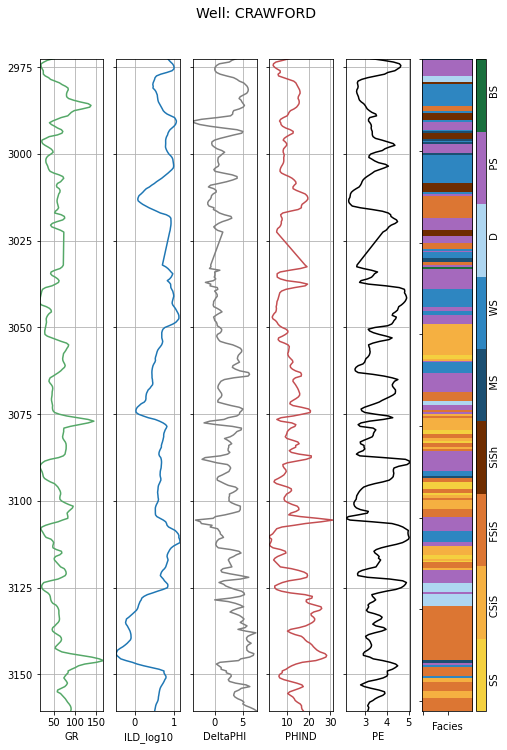

In [43]:
make_facies_log_plot(fdata[fdata['Well Name'] == 'CRAWFORD'],facies_colors)

We can look at distribution of Facies, graphically:

SS       20
CSiS    159
FSiS    154
SiSh     65
MS       49
WS      127
D        26
PS      212
BS       18
Name: Facies, dtype: int64

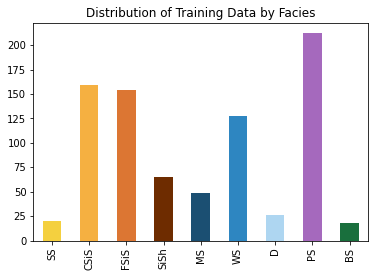

In [44]:
#count the number of unique entries for each facies, sort them by facies number (instead of by number of entries)
facies_counts = fdata['Facies'].value_counts().sort_index()

#use facies labels to index each count
facies_counts.index = facies_labels

facies_counts.plot(kind='bar',color=facies_colors,title='Distribution of Training Data by Facies')
facies_counts

We can visualize how variables relate to each other, using pairsplot:

+ Very nice inverse linear trend are observed between resistivity (ILD-Log10) and porosity (PHIND), indicating the less porous rocks (carbonates) might contain the target hydrocarbons in this very particular geologic setting.

+ The latter bulletpoint is supported, by looking at GR vs resistivity (ILD-Log10) clouds, lower resistivity of sandstones (SS-CSiS) which might contain salty water, while higher resistivity for carbonates (PS-WS), where our oil/Gas might be contained.

+ Also a slight linear trend can be observed betwen PE and porosity. Carbonates exhibit higher values of PE (this is expected). Bafflestones (another type of carbonate) are strongly related to high PE (BS).

+ A low natural radioactivity (GR) is very telling of carbonates, while a high natural radioactivity usually reveals shales (siSh) or siltstones (FSiS).

+ We can draw many similar observations from these plots, some of these very obvious for a geologist expert.


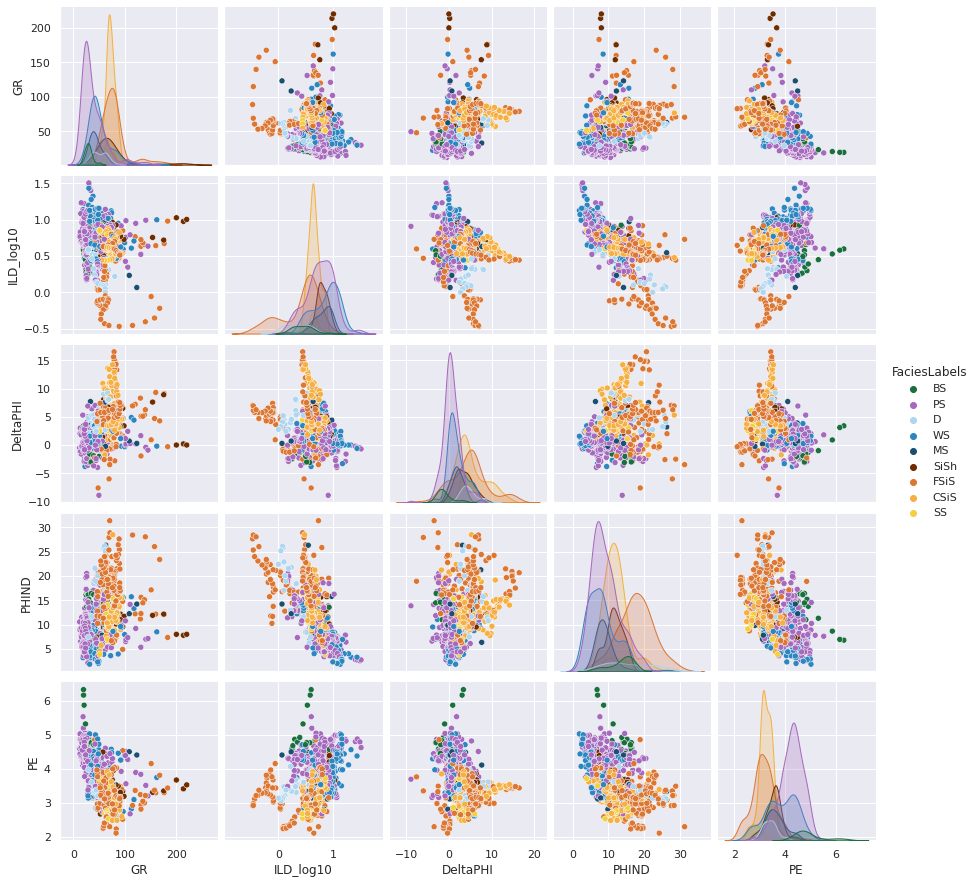

In [45]:
#save plot display settings to change back to when done plotting with seaborn
inline_rc = dict(mpl.rcParams)

sns.set()
sns.pairplot(fdata.drop(['Well Name','Facies','Formation','Depth','NM_M','RELPOS'],axis=1),hue='FaciesLabels', palette=facies_color_map,hue_order=list(reversed(facies_labels)))

#switch back to default matplotlib plot style
mpl.rcParams.update(inline_rc)

We can also visualize each log in a boxplot per facies:

+ Sandstones and Siltstones (FSiS-CSiS-SS) exhibit intermediate values of natural radioactivity, while Shales (SiSH) are more radioactive. Carbonates have low radioactivity (BS-WS-PS). This is expected.

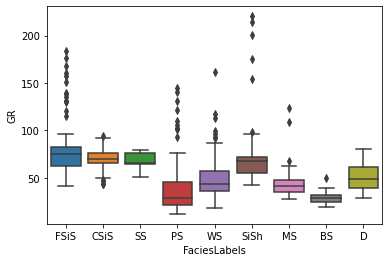

In [46]:
sns.boxplot(x='FaciesLabels', y='GR', data=fdata);

+ Sandstones and Siltstones (FSiS-CSiS-SS) exhibit intermediate values of resistivity which might contain hydrocarbons-Low values of FSiS could be salty water in it's pores, while Shales (SiSH) are somewhat high resistive (could contain trapped oil). 

+ Carbonates are among the most resistive (WS-PS). This could be the target rock for oil/Gas production. Bafflestones and Dolomites (Bf-D) are very low in resistivity, these rocks are dry and seal the hydrocarbons.

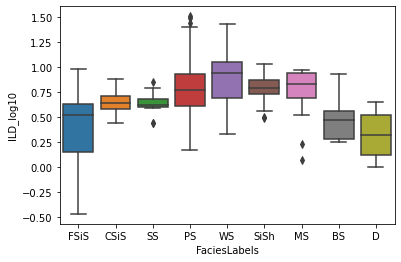

In [47]:
sns.boxplot(x='FaciesLabels', y='ILD_log10', data=fdata);

+ Higher porosity rocks (FSiS+CSiS) are sandstones and siltstones (water-bearing) while lower porosity rocks are carbonates (PS-WS) which might be Hydrocarbons containers.

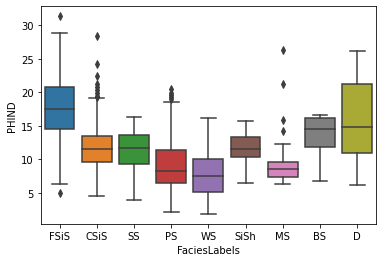

In [48]:
sns.boxplot(x='FaciesLabels', y='PHIND', data=fdata);

+ A high PE is very telling of carbonates. A bafflestone (BS) is an special type of carbonates, here it has the highest PE among all facies.

+ Another carbonates (PS-WS) also react with high values to the PE logging tool.

+ Low PE values are related to Sandstones (FSiS-CSiS-SS).

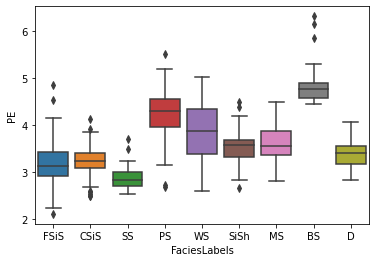

In [49]:
sns.boxplot(x='FaciesLabels', y='PE', data=fdata);

+ This plot is very interesting. It tells how Marine environment deposited rocks (formed in the ocean floor) (NM_M ratio = 2) are all the families of carbonates (PS-WS-BS-D) and Shales, while sandstones are deposited in NonMarine (Continental: for example dust flying in the wind, becoming rocks over time) (NM_M ratio = 1). This is a strong geologic indicator. 

+ Some rocks like Siltsones (CSiS) can be deposited in both environments.

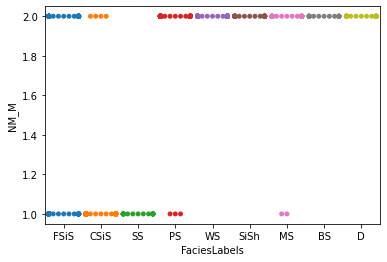

In [50]:
sns.swarmplot(x='FaciesLabels', y='NM_M', data=fdata);

In [51]:
corr_matrix = fdata.corr(method = "spearman")

In [52]:
# Removing the repeated section of the correlation matrix
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

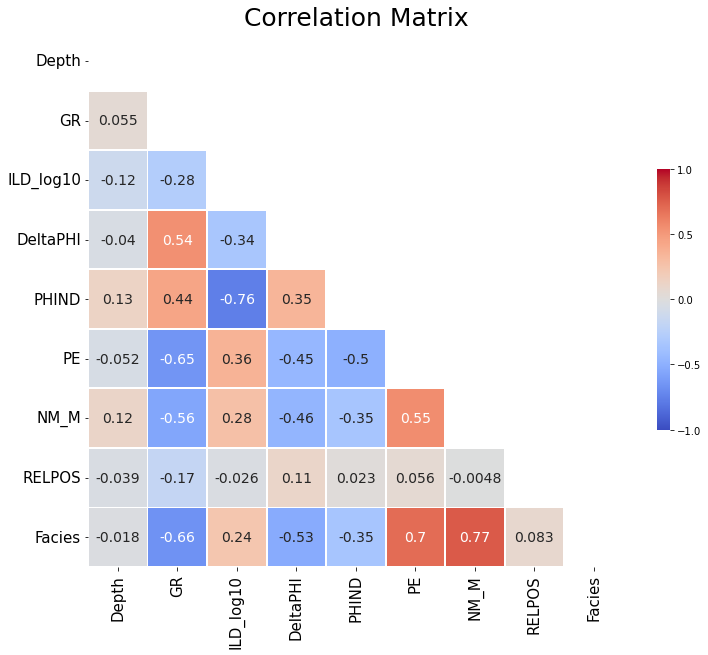

In [53]:
# Create Axis
fig, ax = plt.subplots(figsize=(12, 12))

# Using Seaborn HeatMap
sns.heatmap(corr_matrix, mask = mask, square = True, linewidths = .8, cbar_kws = {'shrink': .4,  'ticks' : [-1, -.5, 0, 0.5, 1]},
            cmap = 'coolwarm', vmin = -1,  vmax = 1, annot = True, annot_kws = {'size': 14})

# Setting Axis Properties
ax.set_yticklabels(corr_matrix.columns, rotation = 0, size = 15)
ax.set_xticklabels(corr_matrix.columns, rotation = 90, size =15)
ax.set_title("Correlation Matrix", size = 25)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

We observe that, except for relative position and depth, the rest of features have some degree of correlation with facies. 

Finally a multilinear correlation of Facies to strong geologic indicators (like PE-GR-NM_M) correlates acceptably well (R2=0.71) and is presented below. This could be used as a very sloppy estimator for quick facies estimation (for example in the oilfield, where engineers need fast answers). 

In [54]:
model = sm.OLS.from_formula("Facies ~ GR + PE + NM_M", 
                            data=fdata)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Facies   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     671.5
Date:                Sun, 20 Mar 2022   Prob (F-statistic):          5.65e-221
Time:                        19:17:13   Log-Likelihood:                -1398.3
No. Observations:                 830   AIC:                             2805.
Df Residuals:                     826   BIC:                             2824.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.9668      0.389     -7.635      0.000      -3.729      -2.204
GR            -0.0168      0.002     -8.445      0.000      -0.021      -0.013
PE             1.2465      0.091     13.699      0.000       1.068       1.425
NM_M           2.5777      0.114     22.524      0.000       2.353       2.802
==============================================================================
Omnibus:                        3.993   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.136   Jarque-Bera (JB):                4.523
Skew:                           0.056   Prob(JB):                        0.104
Kurtosis:                       3.344   Cond. No.                         558.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 1.3 Data Preprocessing

We divide the training data into facies labels and features:

In [55]:
# Identifying the features and labels of the data
Headers = ['GR','ILD_log10','DeltaPHI','PHIND','PE','NM_M','RELPOS'] 
features = fdata.drop(['Formation', 'Well Name', 'Depth','Facies','FaciesLabels'], axis=1)
labels = fdata['Facies'].values

We use sklearn feature scaling, using standardscaler() method, which will transform our features into gaussian distributions 
(0-mean and unit variance). 

In [56]:
# Scaling the data of the training well
scaler = StandardScaler().fit(features) 
scaled_features = scaler.transform(features)

We compare the scaled features to original features, to check the normalization:

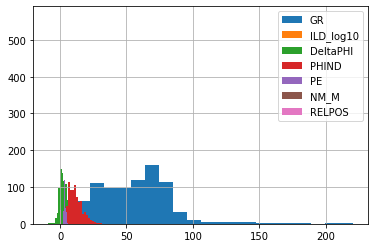

In [57]:
features.apply(lambda col: plt.hist(col, bins = 20))
plt.legend(Headers)
plt.grid()

In [58]:
scl_features = pd.DataFrame(scaled_features, columns=['GR','ILD_log10','DeltaPHI','PHIND','PE','NM_M','RELPOS'])
scl_features.describe()

,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,8.300000e+02,8.300000e+02,8.300000e+02,8.300000e+02,8.300000e+02,8.300000e+02,8.300000e+02
mean,-8.855032e-17,-3.057795e-16,-9.390079e-17,-3.180856e-16,2.669886e-16,5.912272e-16,2.815101e-16
std,1.000603e+00,1.000603e+00,1.000603e+00,1.000603e+00,1.000603e+00,1.000603e+00,1.000603e+00
min,-1.656627e+00,-3.935939e+00,-3.416269e+00,-1.889353e+00,-2.373228e+00,-1.452107e+00,-1.848086e+00
25%,-7.574558e-01,-4.348191e-01,-7.095099e-01,-7.625206e-01,-7.432663e-01,-1.452107e+00,-8.335616e-01
50%,2.663538e-02,3.014625e-02,-1.321116e-01,-1.359673e-01,-2.135479e-01,6.886546e-01,4.133311e-02
75%,5.612186e-01,6.399796e-01,5.081501e-01,6.050525e-01,8.274105e-01,6.886546e-01,8.561341e-01
max,5.917647e+00,2.917095e+00,3.967453e+00,3.793968e+00,4.106583e+00,6.886546e-01,1.640888e+00


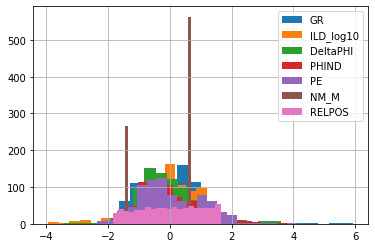

In [59]:
scl_features.apply(lambda col: plt.hist(col, bins = 20))
plt.legend(Headers)
plt.grid()

The dataset will be splitted into training and testing data using 20% of data for validation, and stratification, as some facies are imbalanced with respect to others, as observed in the distribution of training data by facies histogram.

In [60]:
# Splitting the dataset using 20% ratio, random state use to avoid seeing testing data while running code multiple times
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,labels,test_size=0.2,random_state = 3135,
                                                    stratify = labels)

In [61]:
# preprocessing and scaling the data in the blind well
y_testwell = test_well['Facies']
test_features = test_well.drop(['Formation', 'Well Name','Depth','Facies'], axis=1)
X_testwell = scaler.transform(test_features)

## 1.4 Optimal Number of features

---

We need to find optimal number of features to train, because features like Non-Marine to marine environment ratio and Relative Position might have Geologic sense, but perhaps they are meaningless for the classifier, and therefore they might not be important. We train using the 4 required algorithms to observe feature importance and have a preliminary idea of best performers.

### 1.4.1 LR (Logistic Regression)
We use default values for the classifier

<h4>Training</h4>

In [62]:
LR = LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

<h4> Measuring Accuracy </h4>

In [63]:
# Memorization Performance 
mem_score = LR.score(X_train,y_train)
print('Memorization score is: {:.4f}'.format(mem_score))

# Generalization Performance 
gen_score = LR.score(X_test,y_test)
print('Generalization score is: {:.4f}'.format(gen_score))

Memorization score is: 0.6611
Generalization score is: 0.5964


### 1.4.2 RF (Random Forest)
We also use default values and use the feature importance method from the classifier.

<h4>Training</h4>

In [64]:
cforest = RandomForestClassifier()
cforest.fit(X_train, y_train)

RandomForestClassifier()

<h4> Measuring Accuracy </h4>

In [65]:
# Memorization Performance 
mem_score = cforest.score(X_train,y_train)
print('Memorization score is: {:.4f}'.format(mem_score))

# Generalization Performance 
gen_score = cforest.score(X_test,y_test)
print('Generalization score is: {:.4f}'.format(gen_score))

Memorization score is: 1.0000
Generalization score is: 0.7952


<h4> Feature Importance </h4>

 1) GR                             0.188344
 2) PHIND                          0.168388
 3) PE                             0.156457
 4) ILD_log10                      0.139074
 5) RELPOS                         0.132054
 6) DeltaPHI                       0.108546
 7) NM_M                           0.107136


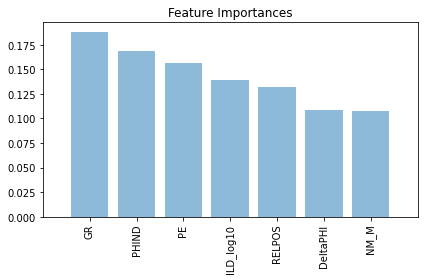

In [66]:
importances = cforest.feature_importances_
# get sort indices in descending order

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, features.columns.values[indices[f]], importances[indices[f]]))

plt.figure()
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),importances[indices],align='center',alpha=0.5)

plt.xticks(range(X_train.shape[1]), features.columns.values[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
# plt.savefig('fig-forest-feature-importances.png', dpi=300)
plt.show()

All features seem important, Relative position, NM_M might not be so influential, and surprisingly porosity difference (DeltaPHI) might also not be influential. We might consider dropping these features for the optimized training phase.

### 1.4.3 KNN (K-Nearest Neighbours)
We use default values for the classifier.

<h4>Training</h4>

In [67]:
knn = KNeighborsClassifier()   #instance
knn.fit(X_train, y_train) # learning

KNeighborsClassifier()

<h4> Measuring Accuracy </h4>

In [68]:
# Memorization Performance 
mem_score = knn.score(X_train,y_train)
print('Memorization score is: {:.4f}'.format(mem_score))

# Generalization Performance 
gen_score = knn.score(X_test,y_test)
print('Generalization score is: {:.4f}'.format(gen_score))

Memorization score is: 0.8539
Generalization score is: 0.7771


### 1.4.4 SVM (Support Vector Machine)

<h4>Training</h4>

In [69]:
clf_SVC = svm.SVC()        
clf_SVC.fit(X_train, y_train)

SVC()

<h4> Measuring Accuracy </h4>

In [70]:
# Memorization Performance 
mem_score = clf_SVC.score(X_train,y_train)
print('Memorization score is: {:.4f}'.format(mem_score))

# Generalization Performance 
gen_score = clf_SVC.score(X_test,y_test)
print('Generalization score is: {:.4f}'.format(gen_score))

Memorization score is: 0.7831
Generalization score is: 0.7410


We observe preliminary (without any optimization yet) that, Knn and SVM are best performers and that relative position and deltaPHI features could be neglected.
We train once more to observe if deleting features helps memorization and generalization scores

In [71]:
# Deleting RELPOS & DeltaPHI feature
features1 = fdata.drop(['Formation', 'Well Name', 'Depth','Facies','FaciesLabels','RELPOS','DeltaPHI','NM_M'], axis=1)

In [72]:
# Scaling the data of the training well
scaler1 = StandardScaler().fit(features1) 
scaled_features1 = scaler1.transform(features1)

In [73]:
# Splitting the dataset using 20% ratio, random state use to avoid seeing testing data while running code multiple times
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(scaled_features1,labels,test_size=0.2,random_state = 3135,
                                                    stratify = labels)

### 1.4.5 KNN (K-Nearest Neighbours)
We use default values for the classifier

In [74]:
# Training KNN
knn = KNeighborsClassifier()   #instance
knn.fit(X_train1, y_train1) # learning

KNeighborsClassifier()

In [75]:
# Memorization Performance 
mem_score = knn.score(X_train1,y_train1)
print('Memorization score is: {:.4f}'.format(mem_score))

# Generalization Performance 
gen_score = knn.score(X_test1,y_test1)
print('Generalization score is: {:.4f}'.format(gen_score))

Memorization score is: 0.7967
Generalization score is: 0.6566


### 1.4.6 SVM (Support Vector Machine)

In [76]:
clf_SVC = svm.SVC()        
clf_SVC.fit(X_train1, y_train1)

SVC()

In [77]:
# Memorization Performance 
mem_score = clf_SVC.score(X_train1,y_train1)
print('Memorization score is: {:.4f}'.format(mem_score))

# Generalization Performance 
gen_score = clf_SVC.score(X_test1,y_test1)
print('Generalization score is: {:.4f}'.format(gen_score))

Memorization score is: 0.6867
Generalization score is: 0.6145


Scores dropped, We therefore conclude, that even tough some features are not as important (REL_POS-DeltPHI), the more data we have the better for the performance.

## 1.5 Optimal Hyperparameters & Performance Metrics for training

We investigated the four required classification algorithms, performance metrics (accuracy, f1, precision scores) and selected
best algorithm based on minimum difference between memorization-generalization scores.

### 1.5.1 Logistic Regression Classifier

In [78]:
# Identifying the main groups of Hyperparameters
MultiClass = ['auto', 'ovr', 'multinomial']
l1ratio = [0,0.2,0.4,0.6,0.8,1] # 0 for l1 Norm, 1 for l2 Norm
C = [0.001, 0.01, 0.1, 1, 10, 100]
score = []

In [79]:
# Generating multiple realizations for the different groups of the hyperparameters

score = []

for k in MultiClass:
    for j in l1ratio:
        for i in C:
            # Only 'elasticnet' penalty will handle intermediate l1 ratios.
            LR = LogisticRegression(penalty='elasticnet',multi_class=k,l1_ratio=j,C=i,max_iter=1000,solver='saga')
            LR.fit(X_train,y_train)
            mem_score = LR.score(X_train,y_train)
            gen_score = LR.score(X_test,y_test)  
            mem_scoref1 = f1_score(y_train,LR.predict(X_train),average='weighted')
            gen_scoref1 = f1_score(y_test,LR.predict(X_test),average='weighted')   
            mem_scorepr = precision_score(y_train,LR.predict(X_train),average='weighted')
            gen_scorepr = precision_score(y_test,LR.predict(X_test),average='weighted')    
            dif = abs(mem_score - gen_score)
            score.append([k,j,i,mem_score,gen_score,mem_scoref1,gen_scoref1,mem_scorepr,gen_scorepr,dif])                

# Printing the result that consists of memorization scores, generalization scores, and their difference for different
# group of hyperparameters
Result = pd.DataFrame(score,columns=['Multi_class','l1_ratio','C','Mem_Score','Gen_Score','Mem_scoref1',          
                                        'Gen_scoref1','Mem_scorepr','Gen_scorepr','Difference'])
Result.head(10)

,Multi_class,l1_ratio,C,Mem_Score,Gen_Score,Mem_scoref1,Gen_scoref1,Mem_scorepr,Gen_scorepr,Difference
0,auto,0.0,0.001,0.530120,0.506024,0.416192,0.393704,0.364713,0.344697,0.024096
1,auto,0.0,0.010,0.558735,0.518072,0.478893,0.440093,0.482062,0.454910,0.040663
2,auto,0.0,0.100,0.626506,0.590361,0.581444,0.548237,0.558836,0.519123,0.036145
3,auto,0.0,1.000,0.661145,0.596386,0.637045,0.572871,0.641894,0.568109,0.064759
4,auto,0.0,10.000,0.668675,0.602410,0.647730,0.588015,0.650709,0.593142,0.066265
5,auto,0.0,100.000,0.670181,0.602410,0.651260,0.594448,0.654965,0.603068,0.067771
6,auto,0.2,0.001,0.256024,0.253012,0.104374,0.102178,0.065548,0.064015,0.003012
7,auto,0.2,0.010,0.554217,0.518072,0.462277,0.420724,0.424153,0.363914,0.036145
8,auto,0.2,0.100,0.623494,0.596386,0.576503,0.550885,0.557866,0.522978,0.027108
9,auto,0.2,1.000,0.662651,0.602410,0.638580,0.582357,0.643618,0.584511,0.060241


In [80]:
# Filtering the result in which we take the highest generalization score with the lowest difference
mask = (Result.Gen_Score >= Result.Gen_Score.quantile(0.8))
Results = Result[mask]
mask1 = (Results.Difference == Results.Difference.min())
n = Results[mask1].index

# Assigning the optimum hyperparameters after implementing hyperparameters optimization on the result
OptMulti = Result.iat[n[0],0]
Optl1ratio = Result.iat[n[0],1]
OptC = Result.iat[n[0],2]
Opt_Mem_Score = Result.iat[n[0],3]
Opt_Gen_Score = Result.iat[n[0],4]

In [81]:
# Applying the optimized LR classifier on the testing well
Eval_LR = ['LR',Opt_Mem_Score,Opt_Gen_Score,OptMulti,Optl1ratio,OptC]

# Printing memorization score on the training well and the generalization score of the testing well
print('Optimized parameters for the logistic Regression Classifier are {} Multi_class, l1_ratio = {}, and C = {}'.format(OptMulti,Optl1ratio,OptC))
print('Memorization Score of the training set is {}'.format(round(Opt_Mem_Score,4)))
print('Generalization Score of the testing set is {}'.format(round(Opt_Gen_Score,4)))

Optimized parameters for the logistic Regression Classifier are ovr Multi_class, l1_ratio = 1.0, and C = 1.0
Memorization Score of the training set is 0.6325
Generalization Score of the testing set is 0.6084


### 1.5.2 K-Nearest Neighbor

In [82]:
# Identifying the groups of Hyperparameters
Neighbors = [3,5,7,9,11,13,15,17,19,21]
Weights = ['uniform', 'distance']
P = [1,2]
score = []

In [83]:
# Generating multiple realizations for the different groups of the hyperparameters

score = []

for k in Neighbors:
    for j in Weights:
        for i in P:
            KNN = KNeighborsClassifier(n_neighbors=k,weights=j,p=i)
            KNN.fit(X_train,y_train)
            mem_score = KNN.score(X_train,y_train)
            gen_score = KNN.score(X_test,y_test) 
            mem_scoref1 = f1_score(y_train,KNN.predict(X_train),average='weighted')
            gen_scoref1 = f1_score(y_test,KNN.predict(X_test),average='weighted')   
            mem_scorepr = precision_score(y_train,KNN.predict(X_train),average='weighted')
            gen_scorepr = precision_score(y_test,KNN.predict(X_test),average='weighted')    
            dif = abs(mem_score - gen_score)
            score.append([k,j,i,mem_score,gen_score,mem_scoref1,gen_scoref1,mem_scorepr,gen_scorepr,dif])                

# Printing the result that consists of memorization scores, generalization scores, and their difference for different
# group of hyperparameters
Result = pd.DataFrame(score,columns=['N_Neighbors','weights','P','Mem_Score','Gen_Score','Mem_scoref1',          
                                        'Gen_scoref1','Mem_scorepr','Gen_scorepr','Difference'])
Result.head(10)

,N_Neighbors,weights,P,Mem_Score,Gen_Score,Mem_scoref1,Gen_scoref1,Mem_scorepr,Gen_scorepr,Difference
0,3,uniform,1,0.908133,0.753012,0.907363,0.752025,0.909919,0.763690,0.155120
1,3,uniform,2,0.915663,0.753012,0.914605,0.750547,0.916581,0.765829,0.162651
2,3,distance,1,1.000000,0.759036,1.000000,0.757277,1.000000,0.765432,0.240964
3,3,distance,2,1.000000,0.777108,1.000000,0.773008,1.000000,0.783602,0.222892
4,5,uniform,1,0.856928,0.753012,0.855665,0.748634,0.857672,0.760601,0.103916
5,5,uniform,2,0.853916,0.777108,0.852095,0.774416,0.854141,0.782178,0.076807
6,5,distance,1,1.000000,0.771084,1.000000,0.766288,1.000000,0.772753,0.228916
7,5,distance,2,1.000000,0.789157,1.000000,0.783962,1.000000,0.785258,0.210843
8,7,uniform,1,0.828313,0.759036,0.826623,0.753835,0.828034,0.760862,0.069277
9,7,uniform,2,0.826807,0.777108,0.824207,0.771558,0.828389,0.773072,0.049699


In [84]:
# Filtering the result in which we take the highest generalization score with the lowest difference
mask = (Result.Gen_Score >= Result.Gen_Score.quantile(0.8))
Results = Result[mask]
mask1 = (Results.Difference == Results.Difference.min())
n = Results[mask1].index

# Assigning the optimum hyperparameters after implementing hyperparameters optimization on the result
OptNeighbors = Result.iat[n[0],0]
Optweights = Result.iat[n[0],1]
OptP = Result.iat[n[0],2]
Opt_Mem_Score = Result.iat[n[0],3]
Opt_Gen_Score = Result.iat[n[0],4]

In [85]:
# Applying the optimized KNN classifier on the testing well
Eval_KNN = ['KNN',Opt_Mem_Score,Opt_Gen_Score,OptNeighbors,Optweights,OptP]

# Printing memorization score on the training well and the generalization score of the testing well
print('Optimized parameters for the K-Nearest Neighbor Classifier are {} neighbors, weight = {}, and P = {}'.format(OptNeighbors,Optweights,OptP))
print('Memorization Score of the training well is {}'.format(round(Opt_Mem_Score,4)))
print('Generalization Score is {} when applied to the test well'.format(round(Opt_Gen_Score,4)))

Optimized parameters for the K-Nearest Neighbor Classifier are 9 neighbors, weight = uniform, and P = 1
Memorization Score of the training well is 0.7892
Generalization Score is 0.7711 when applied to the test well


### 1.5.3 SVM Classifier

In [86]:
# Identifying the groups of Hyperparameters
Kernel = ['linear', 'poly', 'rbf', 'sigmoid']
C = [0.001, 0.01, 0.1, 1, 10, 100]
Gamma = [0.1, 0.5, 1, 5, 10, 15, 20]
score = []

In [87]:
# Generating multiple realizations for the different groups of the hyperparameters

score = []

for k in Kernel:
    for j in C:
        for i in Gamma:
            clf = SVC(C=j,kernel=k,gamma=i)
            clf.fit(X_train,y_train)
            mem_score = clf.score(X_train,y_train)
            gen_score = clf.score(X_test,y_test)  
            mem_scoref1 = f1_score(y_train,clf.predict(X_train),average='weighted')
            gen_scoref1 = f1_score(y_test,clf.predict(X_test),average='weighted')   
            mem_scorepr = precision_score(y_train,clf.predict(X_train),average='weighted')
            gen_scorepr = precision_score(y_test,clf.predict(X_test),average='weighted')  
            dif = abs(mem_score - gen_score)
            score.append([k,j,i,mem_score,gen_score,mem_scoref1,gen_scoref1,mem_scorepr,gen_scorepr,dif])                

# Printing the result that consists of memorization scores, generalization scores, and their difference for different
# group of hyperparameters
Result = pd.DataFrame(score,columns=['Kernel','C','Gamma','Mem_Score','Gen_Score','Mem_scoref1',          
                                        'Gen_scoref1','Mem_scorepr','Gen_scorepr','Difference'])
Result.head(10)

,Kernel,C,Gamma,Mem_Score,Gen_Score,Mem_scoref1,Gen_scoref1,Mem_scorepr,Gen_scorepr,Difference
0,linear,0.001,0.1,0.444277,0.445783,0.287948,0.292495,0.381699,0.382685,0.001506
1,linear,0.001,0.5,0.444277,0.445783,0.287948,0.292495,0.381699,0.382685,0.001506
2,linear,0.001,1.0,0.444277,0.445783,0.287948,0.292495,0.381699,0.382685,0.001506
3,linear,0.001,5.0,0.444277,0.445783,0.287948,0.292495,0.381699,0.382685,0.001506
4,linear,0.001,10.0,0.444277,0.445783,0.287948,0.292495,0.381699,0.382685,0.001506
5,linear,0.001,15.0,0.444277,0.445783,0.287948,0.292495,0.381699,0.382685,0.001506
6,linear,0.001,20.0,0.444277,0.445783,0.287948,0.292495,0.381699,0.382685,0.001506
7,linear,0.010,0.1,0.543675,0.524096,0.455240,0.427067,0.471122,0.433896,0.019578
8,linear,0.010,0.5,0.543675,0.524096,0.455240,0.427067,0.471122,0.433896,0.019578
9,linear,0.010,1.0,0.543675,0.524096,0.455240,0.427067,0.471122,0.433896,0.019578


In [88]:
# Filtering the result in which we take the highest generalization score with the lowest difference
mask = (Result.Gen_Score >= Result.Gen_Score.quantile(0.8))
Results = Result[mask]
mask1 = (Results.Difference == Results.Difference.min())
n = Results[mask1].index

# Assigning the optimum hyperparameters after implementing hyperparameters optimization on the result
OptKern = Result.iat[n[0],0]
OptC = Result.iat[n[0],1]
OptGamma = Result.iat[n[0],2]
Opt_Mem_Score = Result.iat[n[0],3]
Opt_Gen_Score = Result.iat[n[0],4]

In [89]:
# Applying the optimized SVM classifier on the testing well
Eval_SVC = ['SVC',Opt_Mem_Score,Opt_Gen_Score,OptKern,OptC,OptGamma]

# Printing memorization score on the training well and the generalization score of the testing well
print('Optimized parameters for the Support Vector Classifier are {} kernel, C = {}, and gamma = {}'.format(OptKern,OptC,OptGamma))
print('Memorization Score of the training well is {}'.format(round(Opt_Mem_Score,4)))
print('Generalization Score is {} when applied to the test well'.format(round(Opt_Gen_Score,4)))

Optimized parameters for the Support Vector Classifier are poly kernel, C = 0.01, and gamma = 1.0
Memorization Score of the training well is 0.7922
Generalization Score is 0.741 when applied to the test well


### 1.5.4 Random Forest

In [90]:
# Identifying the groups of Hyperparameters
Nestimators = [10,20,30,40,50,60,70,80,90,100]
Depth = [2,3,4,5,6,7,8,9,10]
Mfeatures = [2,3,4,5]
score = []

In [91]:
# Generating multiple realizations for the different groups of the hyperparameters

score = []

for k in Nestimators:
    for j in Depth:
        for i in Mfeatures:
            RF = RandomForestClassifier(n_estimators=k, max_depth=j, max_features=i)
            RF.fit(X_train,y_train)
            mem_score = RF.score(X_train,y_train)
            gen_score = RF.score(X_test,y_test)             
            mem_scoref1 = f1_score(y_train,RF.predict(X_train),average='weighted')
            gen_scoref1 = f1_score(y_test,RF.predict(X_test),average='weighted')   
            mem_scorepr = precision_score(y_train,RF.predict(X_train),average='weighted')
            gen_scorepr = precision_score(y_test,RF.predict(X_test),average='weighted')    
            dif = abs(mem_score - gen_score)
            score.append([k,j,i,mem_score,gen_score,mem_scoref1,gen_scoref1,mem_scorepr,gen_scorepr,dif])

# Printing the result that consists of memorization scores, generalization scores, and their difference for different
# group of hyperparameters
Result = pd.DataFrame(score,
          columns=['n_estimators','max_depth','max_features','Mem_Score','Gen_Score',
                   'Mem_scoref1','Gen_scoref1','Mem_scorepr','Gen_scorepr','Difference'])
Result.head(10)

,n_estimators,max_depth,max_features,Mem_Score,Gen_Score,Mem_scoref1,Gen_scoref1,Mem_scorepr,Gen_scorepr,Difference
0,10,2,2,0.552711,0.566265,0.455958,0.462039,0.442768,0.418928,0.013554
1,10,2,3,0.582831,0.560241,0.513695,0.493842,0.470694,0.446071,0.022590
2,10,2,4,0.591867,0.560241,0.528116,0.498173,0.485743,0.451196,0.031627
3,10,2,5,0.599398,0.566265,0.536006,0.508482,0.494639,0.465520,0.033133
4,10,3,2,0.638554,0.590361,0.578193,0.524648,0.626088,0.478879,0.048193
5,10,3,3,0.635542,0.584337,0.569917,0.524643,0.528134,0.480907,0.051205
6,10,3,4,0.628012,0.566265,0.561726,0.514030,0.516611,0.477166,0.061747
7,10,3,5,0.635542,0.602410,0.569474,0.545551,0.527920,0.510458,0.033133
8,10,4,2,0.731928,0.668675,0.706739,0.634956,0.742116,0.627688,0.063253
9,10,4,3,0.719880,0.680723,0.680522,0.644280,0.689155,0.679104,0.039157


In [92]:
# Filtering the result in which we take the highest generalization score with the lowest difference
mask = (Result.Gen_Score >= Result.Gen_Score.quantile(0.8))
Results = Result[mask]
mask1 = (Results.Difference == Results.Difference.min())
n = Results[mask1].index

# Assigning the optimum hyperparameters after implementing hyperparameters optimization on the result
OptN = Result.iat[n[0],0]
OptM = Result.iat[n[0],1]
OptF = Result.iat[n[0],2]
Opt_Mem_Score = Result.iat[n[0],3]
Opt_Gen_Score = Result.iat[n[0],4]

In [93]:
# Applying the optimized RF classifier on the testing well
Eval_RF = ['RF',Opt_Mem_Score,Opt_Gen_Score,OptN,OptM,OptF]

# Printing memorization score on the training well and the generalization score of the testing well
print('Optimized parameters for the Random Forest Classifier are {} trees, max depth = {}, and max features = {}'.format(OptN,OptM,OptF))
print('Memorization Score of the training well is {}'.format(round(Opt_Mem_Score,4)))
print('Generalization Score is {} when applied to the test well'.format(round(Opt_Gen_Score,4)))

Optimized parameters for the Random Forest Classifier are 70 trees, max depth = 6, and max features = 4
Memorization Score of the training well is 0.8675
Generalization Score is 0.7771 when applied to the test well


## 1.6 Optimal Classifier & Performance Metrics

We picked the best classifier algorithm here and best performance metric seems to be accuracy, from our previous runs.

In [94]:
# Summarizing the results in a table and EvaLuating them
Eval=[Eval_LR,Eval_KNN,Eval_SVC,Eval_RF]
Eval=pd.DataFrame(Eval, columns=['Classifiers','Memorization_Score','Generalization_Score', 'Opt_Hyperparameter_1', 'Opt_Hyperparameter_2', 'Opt_Hyperparameter_3'])
Eval

,Classifiers,Memorization_Score,Generalization_Score,Opt_Hyperparameter_1,Opt_Hyperparameter_2,Opt_Hyperparameter_3
0,LR,0.632530,0.608434,ovr,1.0,1.0
1,KNN,0.789157,0.771084,9,uniform,1.0
2,SVC,0.792169,0.740964,poly,0.01,1.0
3,RF,0.867470,0.777108,70,6,4.0


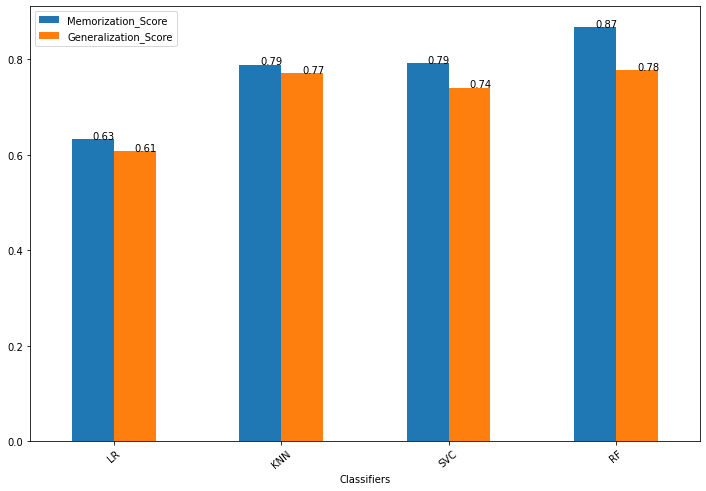

In [95]:
# Plotting the scores in a bar chart

fig, ax = plt.subplots(figsize=(12,8))
Eval.plot.bar(x = 'Classifiers', y = ['Memorization_Score', 'Generalization_Score'], rot = 40, ax = ax)
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()))

In [96]:
# Printing the best classifier with the optimum hyperparameters
n = Eval.Generalization_Score.argmax()
print('The best classifier and its associated optimum hyperparameters are:')
Eval.iloc[n]

The best classifier and its associated optimum hyperparameters are:


Classifiers                   RF
Memorization_Score       0.86747
Generalization_Score    0.777108
Opt_Hyperparameter_1          70
Opt_Hyperparameter_2           6
Opt_Hyperparameter_3         4.0
Name: 3, dtype: object

In [97]:
# Choose best performer

if n == 0:
    Opt1 = Eval_LR[3]
    Opt2 = Eval_LR[4]
    Opt3 = Eval_LR[5]
    Opt_Classifier = LogisticRegression(penalty='elasticnet',multi_class=Opt1,l1_ratio=Opt2,C=Opt3,max_iter=1000,solver='saga')
if n == 1:
    Opt1 = Eval_KNN[3]
    Opt2 = Eval_KNN[4]
    Opt3 = Eval_KNN[5]
    Opt_Classifier = KNeighborsClassifier(n_neighbors=Opt1,weights=Opt2,p=Opt3)
if n == 2:
    Opt1 = Eval_SVC[3]
    Opt2 = Eval_SVC[4]
    Opt3 = Eval_SVC[5]
    Opt_Classifier = SVC(C=Opt2,kernel=Opt1,gamma=Opt3)
if n == 3:
    Opt1 = Eval_RF[3]
    Opt2 = Eval_RF[4]
    Opt3 = Eval_RF[5]
    Opt_Classifier = RandomForestClassifier(n_estimators=Opt1, max_depth=Opt2, max_features=Opt3)

In [98]:
# Training based on the best classifier
Opt_Classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, max_features=4, n_estimators=70)

In [99]:
# Deploying the classifier

y_pred = Opt_Classifier.predict(X_testwell)
mem = Opt_Classifier.score(X_train,y_train)
gen = Opt_Classifier.score(X_testwell,y_testwell)
print('Memorization Score of the best classifier is {}'.format(round(mem,4)))
print('Generalization Score of the best classifier for deployment is {}'.format(round(gen,4)))

Memorization Score of the best classifier is 0.872
Generalization Score of the best classifier for deployment is 0.5612


In [100]:
# Generating the classification report of the best classifier
facies_labels.pop() # We eliminate last value of labels 9=bafflestone, this one does not show on deploy well shankle
print(classification_report(y_testwell, y_pred, target_names=facies_labels))

              precision    recall  f1-score   support

          SS       1.00      0.16      0.27        89
        CSiS       0.52      0.65      0.58        89
        FSiS       0.53      0.78      0.63       117
        SiSh       0.10      0.14      0.12         7
          MS       0.17      0.16      0.16        19
          WS       0.85      0.55      0.67        71
           D       0.83      0.88      0.86        17
          PS       0.51      0.78      0.61        40

    accuracy                           0.56       449
   macro avg       0.56      0.51      0.49       449
weighted avg       0.66      0.56      0.53       449



### 1.7 Deployment on Shankle Well (External)

In [101]:
# Comparing between the true data and the predictions for the test well
test_well['Prediction'] = y_pred

In [102]:
def compare_facies_plot(logs, compadre, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster1 = np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    cluster2 = np.repeat(np.expand_dims(logs[compadre].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=7, figsize=(9, 12))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.ILD_log10, logs.Depth, '-')
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.PHIND, logs.Depth, '-', color='r')
    ax[4].plot(logs.PE, logs.Depth, '-', color='black')
    im1 = ax[5].imshow(cluster1, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    im2 = ax[6].imshow(cluster2, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    
    divider = make_axes_locatable(ax[6])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im2, cax=cax)
    cbar.set_label((17*' ').join([' SS ', 'CSiS', 'FSiS', 
                                'SiSh', ' MS ', ' WS ', ' D  ', 
                                ' PS ', ' BS ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-2):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PE.min(),logs.PE.max())
    ax[5].set_xlabel('Facies')
    ax[6].set_xlabel(compadre)
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([])
    ax[5].set_xticklabels([])
    ax[6].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)
#     f.tight_layout()

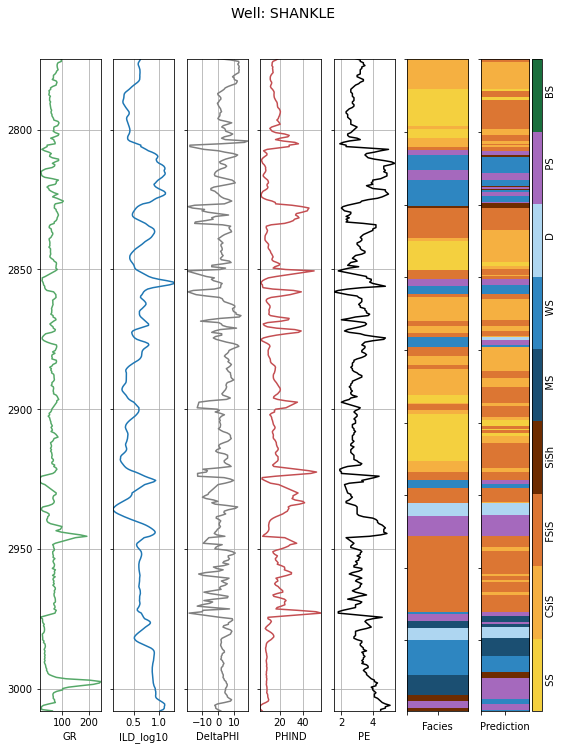

In [103]:
compare_facies_plot(test_well, 'Prediction', facies_colors)

From the Predicted facies seen on logs, we observe a very acceptable classification in most of the intervals.

## <b>Conclusions</b>

Conclusions in the context of Unit 1 (UNAL).

*   Well logs that has lithological (minerals) meaning as Photelectric factor (PE) (0.70) and Gamma Ray (GR) (-0.66) and NM_M (0.77) correlate better with facies, for it's prediction.

* There are interesting correlations between logs like Gamma Ray (GR) and PE (somewhat linear) and Resistivity & Neutro-Density porosity (PhiND), as seen in seaborn pairplots; where self-evident observation can be drawn (obvious to a subject matter expert). 

* Facies distribution in the dataset is higly imbalanced (not uniform) as seen in histograms.

* Carbonates in this reservoir are probably Hydrocarbons bearing (high resistitity) , while sandstones are probably salt water bearing (low resistivity) . Shales and Bafflestones act as rock barries (not fluid containers, but can act as traps to fluid flow).

Conclusions in the context of Unit 2 (UNAL).

*   Log Facies are predicted using Random Forest algorithm, with a memorization score of 0.86 and generalization score of 0.77, using hyperparameters optimization.

*   Hyperparameters optimized includes Number of estimators (70) and Max. Depth of trees (6) and maximum number of features to sample (4) .

*   Among performance Metrics during the optimization, accuracy seems to work better than precision or f1 score.


## <b>References</b>


1.   SPE Glossary, https://petrowiki.spe.org/Category:Glossary
2.   Schlumberger glossary, https://glossary.oilfield.slb.com/en/
3.   Hall, Brendon. Facies classification using machine learning. https://library.seg.org/doi/10.1190/tle35100906.1
4.   Yunxin Xie, Chenyang Zhu et al. Evaluation of machine learning methods for formation lithology identification: A comparison of tuning processes and model performances https://www.sciencedirect.com/science/article/pii/S0920410517308094
5.   Yunxin Xie, Chenyang Zhu et al. Evaluation of machine learning methods for formation lithology identification: A comparison of tuning processes and model performances https://www.sciencedirect.com/science/article/pii/S0920410517308094
6.   Calle Restrepo Felipe, et al. MLDS UNAL course python Notebooks from units-3-4.
7. Misra, Siddarth. PETE-689-Petroleum Data Analytics & machine learning Course Materials. Texas A&M  University. Spring 2022 






